# O que fazer:

Quanto cada empresa (fornecedor) ganhou por licitação

col: nome_proponent / cpf_cnpj_proponent / valor_proposta

# Manuel

In [197]:
import pandas as pd
import numpy as np

In [228]:
df = pd.read_csv('licitacaoes_covid_PB.csv',index_col=0)
df = df[df['nome_modalidade_licitacao'] == 'Dispensa COVID-19 (Art. 4º da Lei 13.979/2020)']
df_lic_winer = df[df['situacao_proposta']=='Vencedora']

In [206]:
pd.options.display.float_format = 'R$ {:,.2f}'.format
df_lic_nome_cpf = pd.DataFrame(df_lic_winer.groupby(['nome_proponente','cpf_cnpj_proponente']).sum())

In [207]:
df_lic_nome_cpf_prop = pd.DataFrame(df_lic_nome_cpf['valor_proposta']).sort_values('valor_proposta',ascending=False)

In [209]:
df

,protocolo_licitacao,numero_licitacao,nome_modalidade_licitacao,nome_municipio,cd_ugestora,jurisdicionado_id,nome_jurisdicionado,nome_tipo_jurisdicionado,nome_tipo_administracao_jurisdicionado,nome_esfera_jurisdicionado,objeto_licitacao,valor_estimado_licitacao,valor_licitado_licitacao,data_homologacao_licitacao,ano_homologacao_licitacao,situacao_fracassada_licitacao,nome_proponente,cpf_cnpj_proponente,valor_proposta,situacao_proposta,nome_estagio_processual_licitacao,nome_setor_atual_licitacao,url
224214,Doc. 25381/20,00004/2020,Dispensa COVID-19 (Art. 4º da Lei 13.979/2020),São José de Espinharas,201187,774,Prefeitura Municipal de São José de Espinharas,Prefeitura,Direta,Municipal,Aquisição de Cestas básicas a atender o enfret...,R$ nan,"R$ 35,328.00",08/04/2020,2020,Não,BETHOVEN DOS SANTOS DA SILVA,09323745000166,"R$ 35,328.00",Vencedora,Formalizado,GUARDA TEMPORÁRIA,https://tramita.tce.pb.gov.br/tramita/consulta...
224225,Doc. 25467/20,00001/2020,Dispensa COVID-19 (Art. 4º da Lei 13.979/2020),João Pessoa,609095,1010,Fundo Municipal de Assistência Social de João ...,Fundo,Indireta,Municipal,CONTRATAÇÃO DE EMPRESA ESPECIALIZADA PARA AQUI...,R$ nan,"R$ 30,212.60",08/04/2020,2020,Não,Mais Comercio de Descartaveis Ltda,17178985000142,"R$ 30,112.60",Vencedora,Formalizado,GUARDA TEMPORÁRIA,https://tramita.tce.pb.gov.br/tramita/consulta...
224227,Doc. 25472/20,00002/2020,Dispensa COVID-19 (Art. 4º da Lei 13.979/2020),João Pessoa,609095,1010,Fundo Municipal de Assistência Social de João ...,Fundo,Indireta,Municipal,CONTRATAÇÃO DE EMPRESA ESPECIALIZADA PARA AQUI...,R$ nan,"R$ 12,592.00",07/04/2020,2020,Não,Mais Comercio de Descartaveis Ltda,17178985000142,"R$ 12,592.00",Vencedora,Formalizado,GUARDA TEMPORÁRIA,https://tramita.tce.pb.gov.br/tramita/consulta...
224252,Doc. 25481/20,00003/2020,Dispensa COVID-19 (Art. 4º da Lei 13.979/2020),João Pessoa,609095,1010,Fundo Municipal de Assistência Social de João ...,Fundo,Indireta,Municipal,CONTRATAÇÃO DE EMPRESA ESPECIALIZADA PARA AQUI...,R$ nan,"R$ 98,000.00",08/04/2020,2020,Não,Tutto Limp Distribuidora LTDA,05449553000140,"R$ 98,000.00",Vencedora,Formalizado,GUARDA TEMPORÁRIA,https://tramita.tce.pb.gov.br/tramita/consulta...
224261,Doc. 25485/20,00004/2020,Dispensa COVID-19 (Art. 4º da Lei 13.979/2020),João Pessoa,609095,1010,Fundo Municipal de Assistência Social de João ...,Fundo,Indireta,Municipal,CONTRATAÇÃO DE EMPRESA ESPECIALIZADA PARA AQUI...,R$ nan,"R$ 13,450.00",08/04/2020,2020,Não,JSB DISTRIBUIDORA LTDA - ME,16693935000130,"R$ 13,450.00",Vencedora,Formalizado,GUARDA TEMPORÁRIA,https://tramita.tce.pb.gov.br/tramita/consulta...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235325,Doc. 51791/20,00041/2020,Dispensa COVID-19 (Art. 4º da Lei 13.979/2020),Juripiranga,601099,11268,Fundo Municipal de Saúde de Juripiranga,Fundo,Indireta,Municipal,"Aquisição de Ar Condicionado Tipo Split, capac...",R$ nan,"R$ 3,000.00",07/08/2020,2020,Não,THOMAS JOSE BELTRAO DE ARAUJO ALBUQUERQUE - ME,19918905000173,"R$ 3,000.00",Vencedora,Formalizado,GUARDA TEMPORÁRIA,https://tramita.tce.pb.gov.br/tramita/consulta...
235326,Doc. 51802/20,00042/2020,Dispensa COVID-19 (Art. 4º da Lei 13.979/2020),Juripiranga,601099,11268,Fundo Municipal de Saúde de Juripiranga,Fundo,Indireta,Municipal,"Aquisição de 40 caixas de teste rápido, cada u...",R$ nan,"R$ 50,000.00",12/08/2020,2020,Não,ATACAMED COMÉRCIO DE PRODS FARMACÊUTICOS E HOS...,09260831000177,"R$ 55,000.00",Perdedora,Formalizado,GUARDA TEMPORÁRIA,https://tramita.tce.pb.gov.br/tramita/consulta...
235327,Doc. 51802/20,00042/2020,Dispensa COVID-19 (Art. 4º da Lei 13.979/2020),Juripiranga,601099,11268,Fundo Municipal de Saúde de Juripiranga,Fundo,Indireta,Municipal,"Aquisição de 40 caixas de teste rápido, cada u...",R$ nan,"R$ 50,000.00",12/08/2020,2020,Não,NACIONAL COMÉRCIO E REPRESENTAÇÃO LTDA,18588224000121,"R$ 53,040.00",Perdedora,Formalizado,GUARDA TEMPORÁRIA,https://tramita.tce.pb.gov.br/tramita/consulta...


In [201]:
df_lic_nome_cpf_prop.to_csv('df_lic_nome_cpf_prop.csv')

In [202]:
df_means=pd.DataFrame(df_lic_winer.groupby(['nome_municipio','nome_jurisdicionado']).mean()['valor_proposta'])

# Valor proposto com médias Medias , por nome de municipio e jurisdicionado

In [ ]:
df_all = pd.DataFrame(df_lic_winer.groupby(['nome_municipio','nome_jurisdicionado']).sum()['valor_proposta'])
df_all['medias'] = df_means

In [ ]:
df_all.columns = ['valor proposta','medias']

In [ ]:
df_all.to_csv('df_mun_jurisdi.csv')

In [ ]:
# ultima data de licitação
df.data_homologacao_licitacao.values

array(['08/04/2020', '08/04/2020', '07/04/2020', ..., '13/08/2020',
       '13/08/2020', '13/08/2020'], dtype=object)

In [ ]:
df_type = pd.DataFrame(df_lic_winer.groupby('nome_tipo_administracao_jurisdicionado', as_index=False).mean()['valor_proposta'])

In [ ]:
df_type.index = ['Direta', 'Indireta']
df_type.columns = ['Valor proposto']

In [ ]:
df_type

,Valor proposto
Direta,"R$ 398,110.94"
Indireta,"R$ 152,089.10"


# Aplicando benford

In [210]:
pip install benford_py

  Created wheel for benford-py: filename=benford_py-0.2.7-cp36-none-any.whl size=24791 sha256=3917cb669b482fb8f6c3d8e6a79af7f745062b43926ce1643be13e04a4fe965b
  Stored in directory: /root/.cache/pip/wheels/93/82/05/cdea70073a8625826e7d2a443a24fca408c95c07a6b31df125
Successfully built benford-py


In [212]:
pip install benfordslaw

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=f95800c8687790c9304a95963121d5fffa649435220967a1d1f54d3b8eadbdc8
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [213]:
import benfordslaw as bl
import pandas as pd

In [216]:
X = df.valor_licitado_licitacao.values
bl.fit(X)
# Há indicios que pode ter ocorrido 

[benfordslaw] >[chi2] Anomaly detected! P=0.0450266, Tstat=15.8202


{'P': 0.045026593097741735,
 'alpha': 0.05,
 'method': 'chi2',
 'percentage_emp': array([[ 1.        , 29.90320937],
        [ 2.        , 17.67702496],
        [ 3.        , 12.22618441],
        [ 4.        , 11.46204789],
        [ 5.        ,  8.96586857],
        [ 6.        ,  5.85838003],
        [ 7.        ,  5.19612837],
        [ 8.        ,  4.22822211],
        [ 9.        ,  4.48293428]]),
 't': 15.820233767212745}

In [219]:
import benford as bf

In [229]:
#  Vencedor, apenas

In [ ]:
valor

In [232]:
X = df_lic_winer.valor_licitado_licitacao.values


Initialized sequence with 1234 registries.
First_2_Dig
10   0.05
11   0.03
12   0.03
13   0.03
14   0.03
     ... 
95   0.00
96   0.00
97   0.01
98   0.01
99   0.01
Name: Found, Length: 90, dtype: float64

Test performed on 1234 registries.
Discarded 0 records < 10 after preparation.

The entries with the significant positive deviations are:

             Expected  Found  Z_score
First_2_Dig                          
24               0.02   0.03     3.59
49               0.01   0.02     3.56
99               0.00   0.01     3.50
73               0.01   0.01     3.05


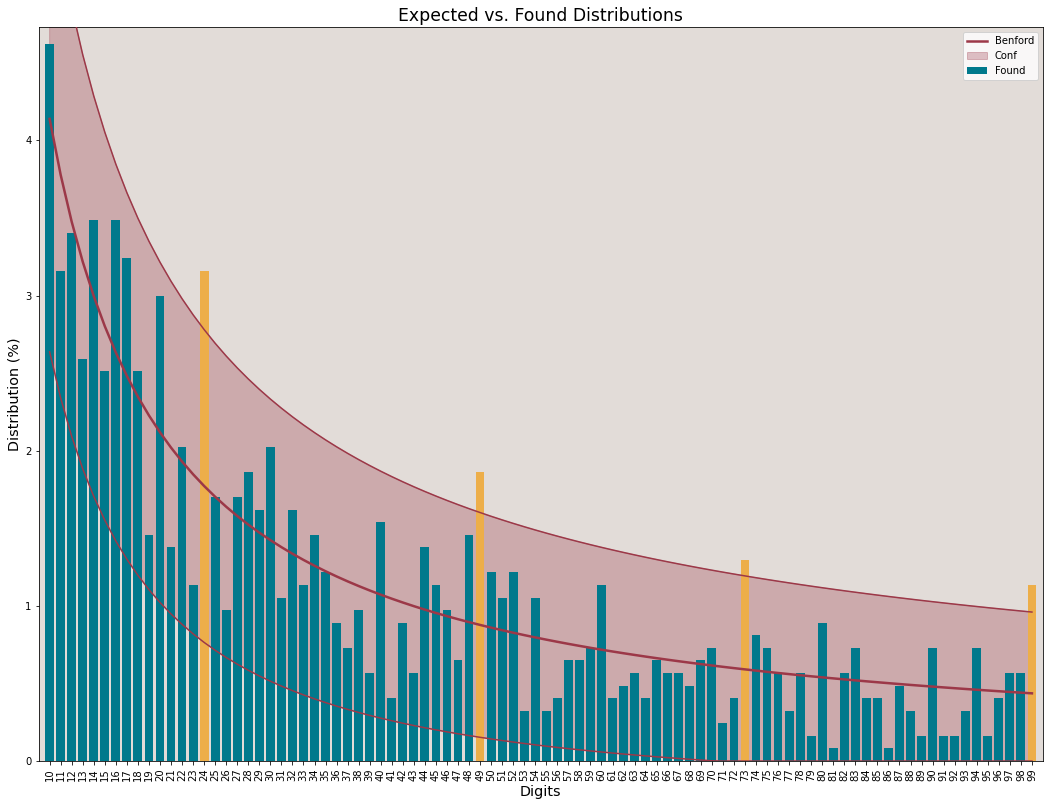

In [233]:
pd.options.display.float_format = '{:,.2f}'.format
model = bf.first_digits(X, digs=2, decimals=8, confidence=99)

In [257]:

def test(x):
  return x[:2] in ['24','49','73','99']

df_lic_winer[df_lic_winer.valor_licitado_licitacao.astype(str).apply(test)].cpf_cnpj_proponente[['nome_prop']].value_counts()

,nome_proponente,cpf_cnpj_proponente
count,92,92
unique,78,78
top,Saúde Médica Com. Ltda - EPP,15218561000139
freq,3,3


In [272]:

df_lic_winer[df_lic_winer.cpf_cnpj_proponente == '08397547000184'].valor_licitado_licitacao.sum()

366940.0